# Structure des méthodes pour l'app


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Circle, Rectangle, Arc
from ncaam.src.dao.loader import Loader

In [3]:
loader = Loader()
data = loader.import_data(["MEvents", "MConferenceTourneyGames", "MGameCities", "MNCAATourneyCompactResults",
                           "MNCAATourneyDetailedResults", "MRegularSeasonCompactResults", 
                           "MRegularSeasonDetailedResults", "MSecondaryTourneyCompactResults", "MPlayers"])

In [4]:
MEvents = data["MEvents"]

MEvents = MEvents[MEvents.X != 0]
MEvents = MEvents[MEvents.Y != 0]
MEvents

,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType,X,Y,Area
10448383,10448384,2019,1,1123,1232,86,69,10,7,373,1123,927,miss2,jump,7,23,6
10448385,10448386,2019,1,1123,1232,86,69,10,7,373,1123,924,foul,pers,6,62,13
10448387,10448388,2019,1,1123,1232,86,69,0,0,17,1232,5510,miss2,jump,94,70,6
10448390,10448391,2019,1,1123,1232,86,69,10,7,396,1232,5520,foul,pers,91,36,13
10448392,10448393,2019,1,1123,1232,86,69,10,7,415,1123,924,miss2,lay,7,55,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15835824,15835825,2020,128,1450,1160,82,68,82,68,2397,1160,2367,made3,unk,31,85,9
15835828,15835829,2020,128,1450,1160,82,68,12,8,366,1450,14907,foul,pers,92,44,1
15835837,15835838,2020,128,1450,1160,82,68,0,0,22,1160,2389,miss2,jump,86,77,6
15835838,15835839,2020,128,1450,1160,82,68,12,9,385,1450,14941,miss2,jump,24,49,5


In [5]:
# Normalize X, Y positions for court dimentions
# Court is 50 feet wide and 94 feet end to end.
MEvents['X'] = (MEvents['X'] * (94/100))
MEvents['Y'] = (MEvents['Y'] * (50/100))

## Créer une fonction qui plot le terrain

In [6]:
#def plot_court() -> None:
#    pass

def plot_court(ax=None, three_line='mens', court_color='#dfbb85',lw=3, lines_color='black', lines_alpha=0.5, 
               paint_fill='blue', paint_alpha=0.4, inner_arc=False) -> None:

    if ax is None:
        ax = plt.gca()

    center_circle = Circle((94/2, 50/2), 6, linewidth=lw, color=lines_color, lw=lw, fill=False, 
                           alpha=lines_alpha)
    hoop_left = Circle((5.25, 50/2), 1.5 / 2, linewidth=lw, color=lines_color, lw=lw, fill=False, 
                       alpha=lines_alpha)
    hoop_right = Circle((94-5.25, 50/2), 1.5 / 2, linewidth=lw, color=lines_color, lw=lw, fill=False, 
                        alpha=lines_alpha)

    left_paint = Rectangle((0, (50/2)-6), 18.833333, 12, fill=paint_fill, alpha=paint_alpha, lw=lw, 
                           edgecolor=None)
    right_paint = Rectangle((94-18.83333, (50/2)-6), 18.833333, 12, fill=paint_fill, alpha=paint_alpha, lw=lw,
                            edgecolor=None)
    
    left_paint_boarder = Rectangle((0, (50/2)-6), 18.833333, 12, fill=False, alpha=lines_alpha, lw=lw, 
                                   edgecolor=lines_color)
    right_paint_boarder = Rectangle((94-18.83333, (50/2)-6), 18.833333, 12, fill=False, alpha=lines_alpha,
                            lw=lw, edgecolor=lines_color)

    left_arc = Arc((18.833333, 50/2), 12, 12, theta1=-90, theta2=90, color=lines_color, lw=lw,
                   alpha=lines_alpha)
    right_arc = Arc((94-18.833333, 50/2), 12, 12, theta1=90, theta2=-90, color=lines_color, lw=lw,
                    alpha=lines_alpha)
    
    leftblock1 = Rectangle((7, (50/2)-6-0.666), 1, 0.666, fill=True, alpha=lines_alpha, lw=0, 
                           edgecolor=lines_color, facecolor=lines_color)
    leftblock2 = Rectangle((7, (50/2)+6), 1, 0.666, fill=True, alpha=lines_alpha, lw=0, 
                           edgecolor=lines_color, facecolor=lines_color)
    ax.add_patch(leftblock1)
    ax.add_patch(leftblock2)
    
    left_l1 = Rectangle((11, (50/2)-6-0.666), 0.166, 0.666, fill=True, alpha=lines_alpha, lw=0, 
                        edgecolor=lines_color, facecolor=lines_color)
    left_l2 = Rectangle((14, (50/2)-6-0.666), 0.166, 0.666, fill=True, alpha=lines_alpha, lw=0, 
                        edgecolor=lines_color, facecolor=lines_color)
    left_l3 = Rectangle((17, (50/2)-6-0.666), 0.166, 0.666, fill=True, alpha=lines_alpha, lw=0, 
                        edgecolor=lines_color, facecolor=lines_color)
    ax.add_patch(left_l1)
    ax.add_patch(left_l2)
    ax.add_patch(left_l3)
    left_l4 = Rectangle((11, (50/2)+6), 0.166, 0.666, fill=True, alpha=lines_alpha, lw=0, 
                        edgecolor=lines_color, facecolor=lines_color)
    left_l5 = Rectangle((14, (50/2)+6), 0.166, 0.666, fill=True, alpha=lines_alpha, lw=0, 
                        edgecolor=lines_color, facecolor=lines_color)
    left_l6 = Rectangle((17, (50/2)+6), 0.166, 0.666, fill=True, alpha=lines_alpha, lw=0, 
                        edgecolor=lines_color, facecolor=lines_color)
    ax.add_patch(left_l4)
    ax.add_patch(left_l5)
    ax.add_patch(left_l6)
    
    rightblock1 = Rectangle((94-7-1, (50/2)-6-0.666), 1, 0.666, fill=True, alpha=lines_alpha, lw=0, 
                            edgecolor=lines_color, facecolor=lines_color)
    rightblock2 = Rectangle((94-7-1, (50/2)+6), 1, 0.666, fill=True, alpha=lines_alpha, lw=0, 
                            edgecolor=lines_color, facecolor=lines_color)
    ax.add_patch(rightblock1)
    ax.add_patch(rightblock2)

    right_l1 = Rectangle((94-11, (50/2)-6-0.666), 0.166, 0.666, fill=True, alpha=lines_alpha, lw=0, 
                         edgecolor=lines_color, facecolor=lines_color)
    right_l2 = Rectangle((94-14, (50/2)-6-0.666), 0.166, 0.666, fill=True, alpha=lines_alpha, lw=0, 
                         edgecolor=lines_color, facecolor=lines_color)
    right_l3 = Rectangle((94-17, (50/2)-6-0.666), 0.166, 0.666, fill=True, alpha=lines_alpha, lw=0, 
                         edgecolor=lines_color, facecolor=lines_color)
    ax.add_patch(right_l1)
    ax.add_patch(right_l2)
    ax.add_patch(right_l3)
    right_l4 = Rectangle((94-11, (50/2)+6), 0.166, 0.666, fill=True, alpha=lines_alpha, lw=0, 
                         edgecolor=lines_color, facecolor=lines_color)
    right_l5 = Rectangle((94-14, (50/2)+6), 0.166, 0.666, fill=True, alpha=lines_alpha, lw=0, 
                         edgecolor=lines_color, facecolor=lines_color)
    right_l6 = Rectangle((94-17, (50/2)+6), 0.166, 0.666, fill=True, alpha=lines_alpha, lw=0, 
                         edgecolor=lines_color, facecolor=lines_color)
    ax.add_patch(right_l4)
    ax.add_patch(right_l5)
    ax.add_patch(right_l6)
    
    if (three_line == 'mens') | (three_line == 'both'):

        three_pt_left = Arc((6.25, 50/2), 44.291, 44.291, theta1=-78, theta2=78, color=lines_color, lw=lw,
                            alpha=lines_alpha)
        three_pt_right = Arc((94-6.25, 50/2), 44.291, 44.291, theta1=180-78, theta2=180+78,
                             color=lines_color, lw=lw, alpha=lines_alpha)

        ax.plot((0, 11.25), (3.34, 3.34), color=lines_color, lw=lw, alpha=lines_alpha)
        ax.plot((0, 11.25), (50-3.34, 50-3.34), color=lines_color, lw=lw, alpha=lines_alpha)
        ax.plot((94-11.25, 94), (3.34, 3.34), color=lines_color, lw=lw, alpha=lines_alpha)
        ax.plot((94-11.25, 94), (50-3.34, 50-3.34), color=lines_color, lw=lw, alpha=lines_alpha)
        ax.add_patch(three_pt_left)
        ax.add_patch(three_pt_right)

    if (three_line == 'womens') | (three_line == 'both'):
        three_pt_left_w = Arc((6.25, 50/2), 20.75 * 2, 20.75 * 2, theta1=-85,
                              theta2=85, color=lines_color, lw=lw, alpha=lines_alpha)
        three_pt_right_w = Arc((94-6.25, 50/2), 20.75 * 2, 20.75 * 2,
                               theta1=180-85, theta2=180+85,
                               color=lines_color, lw=lw, alpha=lines_alpha)

        ax.plot((0, 8.3), (4.25, 4.25), color=lines_color, lw=lw, alpha=lines_alpha)
        ax.plot((0, 8.3), (50-4.25, 50-4.25), color=lines_color, lw=lw, alpha=lines_alpha)
        ax.plot((94-8.3, 94), (4.25, 4.25), color=lines_color, lw=lw, alpha=lines_alpha)
        ax.plot((94-8.3, 94), (50-4.25, 50-4.25), color=lines_color, lw=lw, alpha=lines_alpha)

        ax.add_patch(three_pt_left_w)
        ax.add_patch(three_pt_right_w)

    ax.add_patch(left_paint)
    ax.add_patch(left_paint_boarder)
    ax.add_patch(right_paint)
    ax.add_patch(right_paint_boarder)
    ax.add_patch(center_circle)
    ax.add_patch(hoop_left)
    ax.add_patch(hoop_right)
    ax.add_patch(left_arc)
    ax.add_patch(right_arc)
    
    if inner_arc:
        left_inner_arc = Arc((18.833333, 50/2), 12, 12, theta1=90, theta2=-90, color=lines_color, lw=lw, 
                             alpha=lines_alpha, ls='--')
        right_inner_arc = Arc((94-18.833333, 50/2), 12, 12, theta1=-90, theta2=90, color=lines_color, lw=lw,
                              alpha=lines_alpha, ls='--')
        ax.add_patch(left_inner_arc)
        ax.add_patch(right_inner_arc)

    restricted_left = Arc((6.25, 50/2), 8, 8, theta1=-90, theta2=90, color=lines_color, lw=lw, 
                          alpha=lines_alpha)
    restricted_right = Arc((94-6.25, 50/2), 8, 8, theta1=180-90, theta2=180+90, color=lines_color, lw=lw, 
                           alpha=lines_alpha)
    ax.add_patch(restricted_left)
    ax.add_patch(restricted_right)
    
    ax.plot((4, 4), ((50/2) - 3, (50/2) + 3), color=lines_color, lw=lw*1.5, alpha=lines_alpha)
    ax.plot((94-4, 94-4), ((50/2) - 3, (50/2) + 3), color=lines_color, lw=lw*1.5, alpha=lines_alpha)
    ax.plot((4, 4.6), (50/2, 50/2), color=lines_color, lw=lw, alpha=lines_alpha)
    ax.plot((94-4, 94-4.6), (50/2, 50/2), color=lines_color, lw=lw, alpha=lines_alpha)

    ax.axvline(94/2, color=lines_color, lw=lw, alpha=lines_alpha)

    boarder = Rectangle((0.3,0.3), 94-0.4, 50-0.4, fill=False, lw=3, color='black', alpha=lines_alpha)
    ax.add_patch(boarder)
    
    ax.set_xlim(0, 94)
    ax.set_ylim(0, 50)
    ax.set_facecolor(court_color)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    return ax


#fig, ax = plt.subplots(figsize=(15, 8.5))
#create_ncaa_full_court(ax, three_line='both', paint_alpha=0.4)
#plt.show()

In [7]:
MEvents.X.unique()

array([ 6.58,  5.64, 88.36, 85.54, 63.92, 21.62, 30.08, 27.26, 81.78,
        7.52, 83.66,  8.46, 66.74, 75.2 , 13.16, 10.34, 82.72, 11.28,
       78.02, 87.42, 20.68, 76.14,  9.4 , 28.2 , 31.96, 15.04, 14.1 ,
       80.84, 71.44, 86.48, 84.6 , 45.12, 68.62, 15.98, 62.98, 18.8 ,
       89.3 , 29.14, 12.22, 79.9 , 73.32, 26.32, 17.86, 65.8 ,  4.7 ,
       74.26, 22.56, 25.38, 19.74, 69.56, 24.44, 62.04, 64.86,  3.76,
       67.68, 90.24, 77.08, 91.18, 72.38, 16.92, 58.28, 32.9 , 92.12,
       61.1 , 70.5 , 23.5 , 78.96, 31.02, 60.16, 42.3 , 50.76, 59.22,
        1.88,  2.82, 44.18, 47.94, 43.24, 47.  , 93.06, 53.58, 34.78,
       33.84, 56.4 ,  0.94, 55.46, 52.64, 39.48, 38.54, 54.52, 35.72,
       37.6 , 57.34, 48.88, 36.66, 51.7 , 41.36, 40.42, 49.82, 46.06,
       94.  ])

## Création de la variable MatchID

In [8]:
"""
Tables contenant le quadruplet : ["Season", "DayNum", "WTeamID", "LTeamID"]
    - MEvents
    - MConferenceTourneyGames
    - MGameCities
    - MNCAATourneyCompactResults
    - MNCAATourneyDetailedResults
    - MRegularSeasonCompactResults
    - MRegularSeasonDetailedResults
    - MSecondaryTourneyCompactResults
"""

'\nTables contenant le quadruplet : ["Season", "DayNum", "WTeamID", "LTeamID"]\n    - MEvents\n    - MConferenceTourneyGames\n    - MGameCities\n    - MNCAATourneyCompactResults\n    - MNCAATourneyDetailedResults\n    - MRegularSeasonCompactResults\n    - MRegularSeasonDetailedResults\n    - MSecondaryTourneyCompactResults\n'

In [9]:
# On garde les 4 colonnes qui permettent de créer un MatchID unique et la saison 2015 pour réduire le df
# Variables utiles pour le groupby()
# df_2019 = df_2019[['Season', 'DayNum', 'WTeamID', 'LTeamID']]

# Variables utiles
df_2019 = MEvents[['Season', 'DayNum', 'WTeamID', 'LTeamID', 'EventPlayerID', 'EventType', 'X', 'Y']]

# Shots à 2 et 3 points râtés et réussis
df_2019_shots = df_2019[df_2019['EventType'].str.contains('miss2')| df_2019['EventType'].str.contains('made2')|
                  df_2019['EventType'].str.contains('made3') | df_2019['EventType'].str.contains('made3')]

# Sur une seule saison (2019)
df_2019_shots = df_2019_shots.loc[df_2019_shots['Season'] == 2019]
df_2019_shots.head()

,Season,DayNum,WTeamID,LTeamID,EventPlayerID,EventType,X,Y
10448383,2019,1,1123,1232,927,miss2,6.58,11.5
10448387,2019,1,1123,1232,5510,miss2,88.36,35.0
10448392,2019,1,1123,1232,924,miss2,6.58,27.5
10448409,2019,1,1123,1232,5520,miss2,81.78,24.5
10448423,2019,1,1123,1232,930,made2,5.64,28.5


In [10]:
# Le renseignement sur les positions de shots intervient seulement en 2019 et 2020

print(df_2019.X.unique())
print(" ")
print(df_2019_shots.X.unique())

[ 6.58  5.64 88.36 85.54 63.92 21.62 30.08 27.26 81.78  7.52 83.66  8.46
 66.74 75.2  13.16 10.34 82.72 11.28 78.02 87.42 20.68 76.14  9.4  28.2
 31.96 15.04 14.1  80.84 71.44 86.48 84.6  45.12 68.62 15.98 62.98 18.8
 89.3  29.14 12.22 79.9  73.32 26.32 17.86 65.8   4.7  74.26 22.56 25.38
 19.74 69.56 24.44 62.04 64.86  3.76 67.68 90.24 77.08 91.18 72.38 16.92
 58.28 32.9  92.12 61.1  70.5  23.5  78.96 31.02 60.16 42.3  50.76 59.22
  1.88  2.82 44.18 47.94 43.24 47.   93.06 53.58 34.78 33.84 56.4   0.94
 55.46 52.64 39.48 38.54 54.52 35.72 37.6  57.34 48.88 36.66 51.7  41.36
 40.42 49.82 46.06 94.  ]
 
[ 6.58 88.36 81.78  5.64 83.66  8.46 66.74 13.16  7.52 82.72 11.28 78.02
 87.42 20.68 76.14  9.4  85.54 31.96 15.04 71.44 86.48 84.6  45.12 15.98
 62.98 89.3  29.14 12.22 79.9  10.34 73.32 26.32 65.8  14.1   4.7  25.38
 74.26 24.44  3.76 18.8  77.08 69.56 72.38 80.84 16.92 17.86 90.24 32.9
 21.62 75.2  64.86 78.96 31.02 27.26 62.04 70.5  23.5  63.92 28.2   1.88
  2.82 22.56 68.62 19.74 3

In [11]:
# DataFrame avec MatchId unique --> 5600 matchs en 2019
#                               --> 2103 matchs où X et Y différents de 0

df_id_unique = (df_2019_shots.groupby(['Season','DayNum', 'WTeamID', 'LTeamID']).size().reset_index().rename(columns={0:'count'}))
df_id_unique['MatchID'] = df_id_unique.index
df_id_unique = df_id_unique.drop(['count'], axis=1)
df_id_unique.head()

,Season,DayNum,WTeamID,LTeamID,MatchID
0,2019,1,1123,1232,0
1,2019,1,1130,1454,1
2,2019,1,1138,1384,2
3,2019,1,1181,1246,3
4,2019,1,1197,1239,4


In [12]:
# On applique le MatchID sur l'ensemble du dataframe

df_2019_id = pd.merge(df_2019_shots, df_id_unique,  how='left', 
                      left_on=['Season','DayNum', 'WTeamID', 'LTeamID'], 
                      right_on = ['Season','DayNum', 'WTeamID', 'LTeamID'])
df_2019_id

,Season,DayNum,WTeamID,LTeamID,EventPlayerID,EventType,X,Y,MatchID
0,2019,1,1123,1232,927,miss2,6.58,11.5,0
1,2019,1,1123,1232,5510,miss2,88.36,35.0,0
2,2019,1,1123,1232,924,miss2,6.58,27.5,0
3,2019,1,1123,1232,5520,miss2,81.78,24.5,0
4,2019,1,1123,1232,930,made2,5.64,28.5,0
...,...,...,...,...,...,...,...,...,...
181441,2019,154,1438,1403,14490,miss2,9.40,14.5,2103
181442,2019,154,1438,1403,14490,made3,4.70,3.0,2103
181443,2019,154,1438,1403,12979,miss2,88.36,23.5,2103
181444,2019,154,1438,1403,14495,made2,8.46,25.5,2103


## Récupération du nom des joueurs

In [13]:
# On utilise le df pour avoir le nom de chaque joueur en fonction de son ID pour le merge avec le df précédent
MPlayers = data["MPlayers"]
MPlayers = MPlayers[["PlayerID", "LastName", "FirstName"]]
MPlayers.head()

,PlayerID,LastName,FirstName
0,1,Albright,Christian
1,2,Cameron,Tobias
2,3,Cobb,Chase
3,4,Cooke,Austin
4,5,Crnic,Jovan


In [14]:
df_2019_id_player = pd.merge(df_2019_id, MPlayers,  how='left', left_on=['EventPlayerID'], 
                             right_on = ['PlayerID'])
df_2019_id_player

,Season,DayNum,WTeamID,LTeamID,EventPlayerID,EventType,X,Y,MatchID,PlayerID,LastName,FirstName
0,2019,1,1123,1232,927,miss2,6.58,11.5,0,927.0,Persons,Tayler
1,2019,1,1123,1232,5510,miss2,88.36,35.0,0,5510.0,Key,Tyreke
2,2019,1,1123,1232,924,miss2,6.58,27.5,0,924.0,Moses,Trey
3,2019,1,1123,1232,5520,miss2,81.78,24.5,0,5520.0,Rickman,Emondre
4,2019,1,1123,1232,930,made2,5.64,28.5,0,930.0,Teague,Tahjai
...,...,...,...,...,...,...,...,...,...,...,...,...
181441,2019,154,1438,1403,14490,miss2,9.40,14.5,2103,14490.0,Jerome,Ty
181442,2019,154,1438,1403,14490,made3,4.70,3.0,2103,14490.0,Jerome,Ty
181443,2019,154,1438,1403,12979,miss2,88.36,23.5,2103,12979.0,Culver,Jarrett
181444,2019,154,1438,1403,14495,made2,8.46,25.5,2103,14495.0,Key,Braxton


In [15]:
df_2019_id_player['FullName'] = df_2019_id_player['FirstName'] + " " + df_2019_id_player['LastName']
df_2019_id_player = df_2019_id_player.drop(['PlayerID', 'LastName', 'FirstName'], axis=1)
df_2019_id_player

,Season,DayNum,WTeamID,LTeamID,EventPlayerID,EventType,X,Y,MatchID,FullName
0,2019,1,1123,1232,927,miss2,6.58,11.5,0,Tayler Persons
1,2019,1,1123,1232,5510,miss2,88.36,35.0,0,Tyreke Key
2,2019,1,1123,1232,924,miss2,6.58,27.5,0,Trey Moses
3,2019,1,1123,1232,5520,miss2,81.78,24.5,0,Emondre Rickman
4,2019,1,1123,1232,930,made2,5.64,28.5,0,Tahjai Teague
...,...,...,...,...,...,...,...,...,...,...
181441,2019,154,1438,1403,14490,miss2,9.40,14.5,2103,Ty Jerome
181442,2019,154,1438,1403,14490,made3,4.70,3.0,2103,Ty Jerome
181443,2019,154,1438,1403,12979,miss2,88.36,23.5,2103,Jarrett Culver
181444,2019,154,1438,1403,14495,made2,8.46,25.5,2103,Braxton Key


## Créer une fonction qui récupère les matchs joués par un joueur à partir de son nom 

In [16]:
df = df_2019_id_player.query('FullName=="Sidney Umude"')
df_col_player = df[['Season', 'EventPlayerID', 'EventType','X', 'Y', 'FullName', 'MatchID']]
df_col_player.head()

,Season,EventPlayerID,EventType,X,Y,FullName,MatchID
11432,2019,12013,made2,5.64,25.0,Sidney Umude,129
11434,2019,12013,miss2,9.40,36.0,Sidney Umude,129
11443,2019,12013,miss2,4.70,26.0,Sidney Umude,129
11447,2019,12013,miss2,6.58,23.0,Sidney Umude,129
11486,2019,12013,miss2,6.58,32.0,Sidney Umude,129


In [17]:
list_of_games = df_2019_id_player.query('FullName=="Sidney Umude"').get('MatchID')

unique_games_id = set(list_of_games)
print("***** Unique MatchID : *****")
print(unique_games_id)

***** Unique MatchID : *****
{129, 714, 997}


In [18]:
# Create a function that select all the rows corresponding to a certain player in a dataframe

def get_games_of_a_player(name: str): #-> pd.DataFrame:
    list_of_games = df_2019_id_player.query('FullName=="name"').get('MatchID')
    return(unique_games_id)

get_games_of_a_player('Sidney Umude')

{129, 714, 997}

## Créer une fonction qui récupère les joueurs ayant participé à un certain match

In [19]:
df2 = df_2019_id_player.query('MatchID=="1234"')
df_col_match = df2[['EventType', 'X', 'Y', 'MatchID', 'FullName']]
df_col_match.head()

,EventType,X,Y,MatchID,FullName
106613,made3,71.44,42.5,1234,Ryan Funk
106614,made2,83.66,26.0,1234,Brian Parker
106615,miss2,82.72,25.0,1234,Aleksandar Dozic
106616,made3,28.20,33.5,1234,Stevie Jordan
106617,made2,88.36,25.0,1234,Ryan Funk


In [20]:
list_of_players = df_2019_id_player.query('MatchID=="1234"').get('FullName')

unique_players = set(list_of_players)
print("********** Unique FullName : **********")
print(unique_players)

********** Unique FullName : **********
{'Ryan Funk', 'Tobias Sjoberg', 'Devine Eke', 'Brian Parker', 'Jordan Allen', 'Aleksandar Dozic', 'Anthony Durham', 'Stevie Jordan', 'Matthew Herasme', 'Dimencio Vaughn', 'Isaiah Lamb', 'Austin Williams', 'Frederick Scott', 'Darius  Hines', 'Tyere Marshall', 'Kimar Williams', 'David Knudsen'}


In [21]:
def get_players_of_a_game(matchID: int): #-> pd.DataFrame:
    list_of_players = df_2019_id_player.query('MatchID=="matchID"').get('FullName')
    return(unique_players)

get_players_of_a_game(1086)

{'Aleksandar Dozic',
 'Anthony Durham',
 'Austin Williams',
 'Brian Parker',
 'Darius  Hines',
 'David Knudsen',
 'Devine Eke',
 'Dimencio Vaughn',
 'Frederick Scott',
 'Isaiah Lamb',
 'Jordan Allen',
 'Kimar Williams',
 'Matthew Herasme',
 'Ryan Funk',
 'Stevie Jordan',
 'Tobias Sjoberg',
 'Tyere Marshall'}

## Créer une fonction qui récupère le nom de tous les joueurs de la saison

In [22]:
all_players = df_2019_id_player.get('FullName')

unique_players_season = set(all_players)
print("********** Unique FullName : **********")
print(unique_players_season)

********** Unique FullName : **********
{nan, 'Derek Hawthorne Jr.', 'Isaiah Stokes', 'Sean Good', 'Jaren Lewis', 'Tyler Cheese', 'Andrew Eudy', 'Milik Yarbrough', 'Amorie Archibald', 'Sheldon Eberhardt', 'Derric Jean', 'Aaren Edmead', 'Trevor Moore', 'Paul Newman', 'Fahim  Jenneto', 'Kevion Nolan', 'Petr Herman', 'Neemias Queta', 'Jordan Usher', 'Jordan Chatman', 'Kur Kuath', 'James Hawthorne', 'Caleb Fields', 'Chad Andrews-Fulton', 'Matt Milon', 'Dante Treacy', 'Dimencio Vaughn', 'Hasan Abdullah', 'Callum McRae', 'Mac McClung', 'Malik Petteway', 'Myles Stephens', 'Tavon King', 'Braxton Huggins', 'Clayton Hughes', 'Jalen Smith', 'Mason Jones', 'Damezi Anderson', 'Kris Monroe', 'Javon Pickett', 'Nathan Knight', 'Brian Parker', 'Jackson Stent', 'Tolu Smith', 'Armel Tete', 'Brian White', 'Ricky Gouety', 'Ami Lakoju', 'Ryan Maas', 'Ronald Jackson', 'Darius George', 'Jordan Poole', 'Brandon Carroll', 'Kyle Castlin', 'Dinero Mercurius', 'James Baker', 'James Banks III', 'Troy Green', 'Matij

In [23]:
def get_players_of_a_season(season: int):
    all_players = MEvents.query('Season=="season"').get('FullName')
    unique_players_season
    return unique_players_season

#Soucis avec des NaN --> à voir !
get_players_of_a_season(2018)

/Users/nicolasrousseau/pycharm_projects/ncaam-2020/venv/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


{nan,
 'Derek Hawthorne Jr.',
 'Isaiah Stokes',
 'Sean Good',
 'Jaren Lewis',
 'Tyler Cheese',
 'Andrew Eudy',
 'Milik Yarbrough',
 'Amorie Archibald',
 'Sheldon Eberhardt',
 'Derric Jean',
 'Aaren Edmead',
 'Trevor Moore',
 'Paul Newman',
 'Fahim  Jenneto',
 'Kevion Nolan',
 'Petr Herman',
 'Neemias Queta',
 'Jordan Usher',
 'Jordan Chatman',
 'Kur Kuath',
 'James Hawthorne',
 'Caleb Fields',
 'Chad Andrews-Fulton',
 'Matt Milon',
 'Dante Treacy',
 'Dimencio Vaughn',
 'Hasan Abdullah',
 'Callum McRae',
 'Mac McClung',
 'Malik Petteway',
 'Myles Stephens',
 'Tavon King',
 'Braxton Huggins',
 'Clayton Hughes',
 'Jalen Smith',
 'Mason Jones',
 'Damezi Anderson',
 'Kris Monroe',
 'Javon Pickett',
 'Nathan Knight',
 'Brian Parker',
 'Jackson Stent',
 'Tolu Smith',
 'Armel Tete',
 'Brian White',
 'Ricky Gouety',
 'Ami Lakoju',
 'Ryan Maas',
 'Ronald Jackson',
 'Darius George',
 'Jordan Poole',
 'Brandon Carroll',
 'Kyle Castlin',
 'Dinero Mercurius',
 'James Baker',
 'James Banks III',
 'Tr

## Créer une fonction qui plot les tirs de chaque joueur

In [24]:
def plot_shot_player(name: str): #-> None
    ms = 10 # Marker Size
    FullName = 'name'
    fig, ax = plt.subplots(figsize=(15, 8))
    ax = plot_court(ax)


    df_2019_id_player.query('FullName == @name and EventType == "made2"') \
        .plot(x='X', y='Y', style='o', title='Every shots of the season', alpha=0.5,figsize=(15, 8),
              label='Made 2', ms=ms,ax=ax)
    plt.legend()

    df_2019_id_player.query('FullName == @name and EventType == "miss2"') \
        .plot(x='X', y='Y', style='X', alpha=0.5, ax=ax, label='Missed 2', ms=ms)
    plt.legend()

    df_2019_id_player.query('FullName == @name and EventType == "made3"') \
        .plot(x='X', y='Y', style='o', c='green', alpha=0.5, figsize=(15, 8), label='Made 3', ax=ax, ms=ms)
    plt.legend()

    df_2019_id_player.query('FullName == @name and EventType == "miss3"') \
        .plot(x='X', y='Y', style='X', c='brown', alpha=0.5, ax=ax, label='Missed 3', ms=ms)

    ax.set_xlabel('')
    plt.legend()
    plt.show()

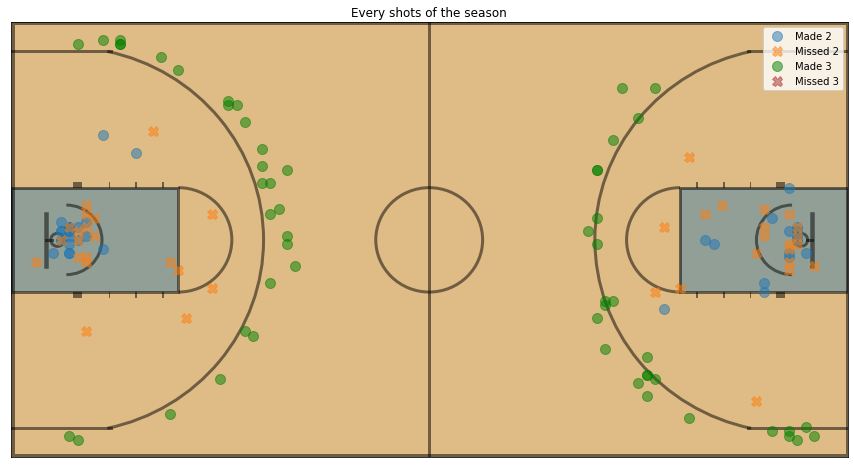

In [25]:
plot_shot_player('Godwin Boahen')

In [26]:
df_2019_id_player.to_csv('/Users/nicolasrousseau/pycharm_projects/ncaam-2020/ncaam/src/df_2019.csv', index=False)